# Simple Statistics

Typografen richtten vanaf 1837 in verschillende steden in Nederland een vereniging op voor onderlinge hulp bij ziekte en voor het organiseren van het Kopperfeest op de eerste maandag na Driekoningen, maar ook andere gelegenheden. Bij feesten zongen zij eigen geschreven teksten op bekende melodieen. Ik probeer zoveel mogelijk van deze teksten, in ieder geval tot 1869 machineleesbaar in te voeren. Daarbij houd ik een CSV-bestand bij van alle liedjes, met daarin de volgende velden: (item,id,titel,wijze,jaartal,schrijver,vereniging_schrijver)
* URL in Zotero
* Identifier van het liedje, opgebouwd uit een code voor de typografische vereniging (indien van toepassing), het titelwoord van het boekje, het jaartal van uitgave en het volgnummer van het liedje in het bewust boekje.
* Titel van het liedje
* Wijze van de melodie
* Jaartal van schrijven
* Schrijver
* Vereniging van de schrijver

Deze notebook geeft een overzicht van de data die ik weet over de liedjes (die tot nu toe zijn ingevoerd). Allereerst lees ik de data in een pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv("../../data/liedjes/liedjes.csv")

Ik wil een overzicht van het aantal liedjes per jaar en per vereniging. Maar eerst: hoeveel liedjes zijn er in totaal en van hoeveel weten we het jaartal en van hoeveel weten we de vereniging.

In [2]:
len(df)

667

In [3]:
df['jaartal'].count()

662

In [4]:
df['vereniging_schrijver'].count()

662

In [5]:
draaitabel = pd.crosstab(df['vereniging_schrijver'], df['jaartal'], margins = True)
draaitabel

jaartal,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,...,1860,1861,1862,1863,1864,1865,1866,1868,186?,All
vereniging_schrijver,,,,,,,,,,,,,,,,,,,,,
amsterdam1847,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
amsterdam1849,0,0,0,6,22,0,0,0,16,16,...,0,12,8,4,4,6,0,0,0,107
amsterdam1857-1,0,0,0,0,0,0,0,0,0,0,...,7,29,20,27,0,12,0,0,2,127
arnhem1849,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,0,16
denbosch1849,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,2
denhaag1843,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,11
gorinchem1856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,5
haarlem1851,0,0,0,0,25,4,0,0,11,0,...,8,4,10,0,0,0,0,0,0,62
leiden1854,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,7,0,0,0,10


Het aantal liedjes in deze draaitabel (aka kruistabel) is niet hetzelfde als de lengte van de dataframe, omdat niet van alle liedjes een jaartal en/of een vereniging bekend is.

In [6]:
# de functie value_counts() ordent op de waarde
df['jaartal'].value_counts()

1856    80
1861    77
1863    60
1859    58
1852    52
1862    47
1854    43
1853    40
1860    35
1858    34
1855    28
1865    25
1857    23
1848    14
1864    13
1866    10
1850     8
1851     8
1849     3
1868     2
186?     2
Name: jaartal, dtype: int64

<AxesSubplot:xlabel='jaartal'>

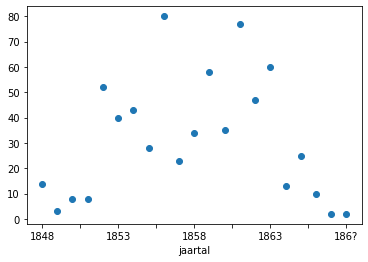

In [7]:
df.groupby('jaartal').size().plot(style = "o")

Nu per vereniging:

<AxesSubplot:xlabel='vereniging_schrijver'>

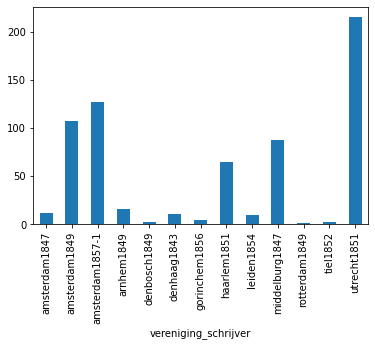

In [8]:
# df['vereniging_schrijver'].value_counts().plot(kind = 'bar')

df.groupby('vereniging_schrijver').size().plot(kind = "bar") 

Welke auteurs hebben meer dan vier liedjes geschreven?

In [9]:
df['schrijver'].value_counts().loc[lambda x : x > 4]

C. Mommaas             45
M. Smidt               38
J.H.C. Venman          31
W. Farber              14
B. Lageman             14
J.C. Paap              12
P.G. van de Kamp       11
J.J. van Stempfoort    11
P. Werthweijn          11
J. Breeman              9
R. Ruitenschild         8
A. Grevenstuk           7
J.P. Nobels             7
H. Stühr                7
J. van den Berg         7
B. van der Karst        6
H. van Nifterick        6
J.P. Dieterich          6
J.H. Regenboog          6
F.W. Vislaake           5
J.F. Vissers            5
A.J. Kreyts             5
J.H.F. Bartels          5
C.J. van Dijk           5
J. Stom                 5
J.H. Dortmond           5
Name: schrijver, dtype: int64

In [10]:
df['wijze'].value_counts().loc[lambda x : x > 5]

Wien Neerlands bloed                       93
Henri's drinklied                          54
De wereld is in rep en roer                43
Io Vivat                                   41
De Koning leef                             19
Wie praalt aan 't hoofd der Heldenstoet    16
Eens werd er aan de zeeuwsche kust         14
Schep vreugde in 't leven                  12
God save the king                          12
Schilder! ‘k wou mij zelv’ eens zien        9
Wij leven vrij, wij leven blij              8
Goeden morgen, mijn heer Becker             7
Wij zijn lustig                             7
O groote koopman in tabak                   6
Name: wijze, dtype: int64

In [11]:
df_subset = df.groupby("wijze").filter(lambda x: len(x) > 5)
draaitabel = pd.crosstab(df_subset['wijze'], df_subset['jaartal'], margins = True)
draaitabel

jaartal,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,All
wijze,,,,,,,,,,,,,,,,,,,,
De Koning leef,0,0,0,0,0,4,2,1,4,0,0,0,1,0,0,2,2,2,0,18
De wereld is in rep en roer,1,0,0,0,2,0,1,2,8,2,5,5,1,4,3,4,1,3,1,43
Eens werd er aan de zeeuwsche kust,0,0,0,0,1,2,0,1,4,1,1,0,0,0,2,1,0,1,0,14
God save the king,1,0,1,1,0,2,1,2,0,0,0,0,1,2,1,0,0,0,0,12
"Goeden morgen, mijn heer Becker",0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,1,0,1,0,7
Henri's drinklied,0,0,0,0,4,1,5,0,9,5,2,7,2,6,5,3,1,4,0,54
Io Vivat,2,1,0,0,1,3,3,2,2,0,4,5,4,7,3,3,0,1,0,41
O groote koopman in tabak,1,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,6
Schep vreugde in 't leven,0,0,1,0,0,0,1,0,2,1,1,1,0,3,1,1,0,0,0,12


Hoeveel boekjes zijn er gedigitaliseerd en welke boekjes zijn dat? Het staat niet in de liedjes-csv, maar kan worden afgeleid uit de id's van de liedjes. Elke identifier begint immers met een identifier van het boekje. Dus: we knippen de id op langs het "-"-teken en plakken alles weer aan elkaar, behalve de laatste.

In [12]:
liedjesList = df['id'].tolist()
boekjesList = []
for liedje in liedjesList:
    liedjeSplit = liedje.split("-")
    boekje = liedjeSplit[0]
    for i in range(len(liedjeSplit) - 2): boekje = boekje + "-" + liedjeSplit[i + 1]
    if not (boekje in boekjesList): boekjesList.append(boekje)
boekjesList.sort()
boekjesList

['??-herinnering',
 '??-liederen1863',
 'album1856',
 'amsterdam1847-reglement1848',
 'amsterdam1849-feestbundel1851',
 'amsterdam1849-feestliederen1852',
 'amsterdam1849-feestliederen1857',
 'amsterdam1849-feestliederen1859',
 'amsterdam1849-feestliederen1862',
 'amsterdam1849-feestliederen1864',
 'amsterdam1849-feestliederen1865',
 'amsterdam1849-hoezee1863',
 'amsterdam1857-1-buitengewone1861',
 'amsterdam1857-1-feestboekje1859',
 'amsterdam1857-1-feestboekje1861',
 'amsterdam1857-1-feestboekje1863',
 'amsterdam1857-1-feestboekje1865',
 'amsterdam1857-1-feestbundel1862a',
 'amsterdam1857-1-feestbundel1862b',
 'amsterdam1857-1-feestlied1863',
 'amsterdam1857-1-feestliederen1860',
 'amsterdam1857-1-feestliederen1861',
 'amsterdam1857-1-feestzangen1859',
 'amsterdam1857-1-klagt',
 'amsterdam1857-1-liederen1858',
 'amsterdam1857-1-liederen1858b',
 'amsterdam1857-1-volkslied1861',
 'amtserdam1849-feestliederen1861',
 'arnhem1849-coupletten1868',
 'arnhem1849-zangcoupletten1856',
 'arnhem

In [13]:
len(boekjesList)

51